# Цель проекта

Нужно отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска. 
А так же:
1. Для каждого столбца найти количество пустых строк, найти и убрать выбросы. 
2. Для количественных переменных построить гистограммы распределений и сделать выводы.
3. Провести корреляционный анализ и анализ номинативных переменных, корректно отобрать переменные для построения модели.
4. Сформулировать промежуточные и итоговые выводы.

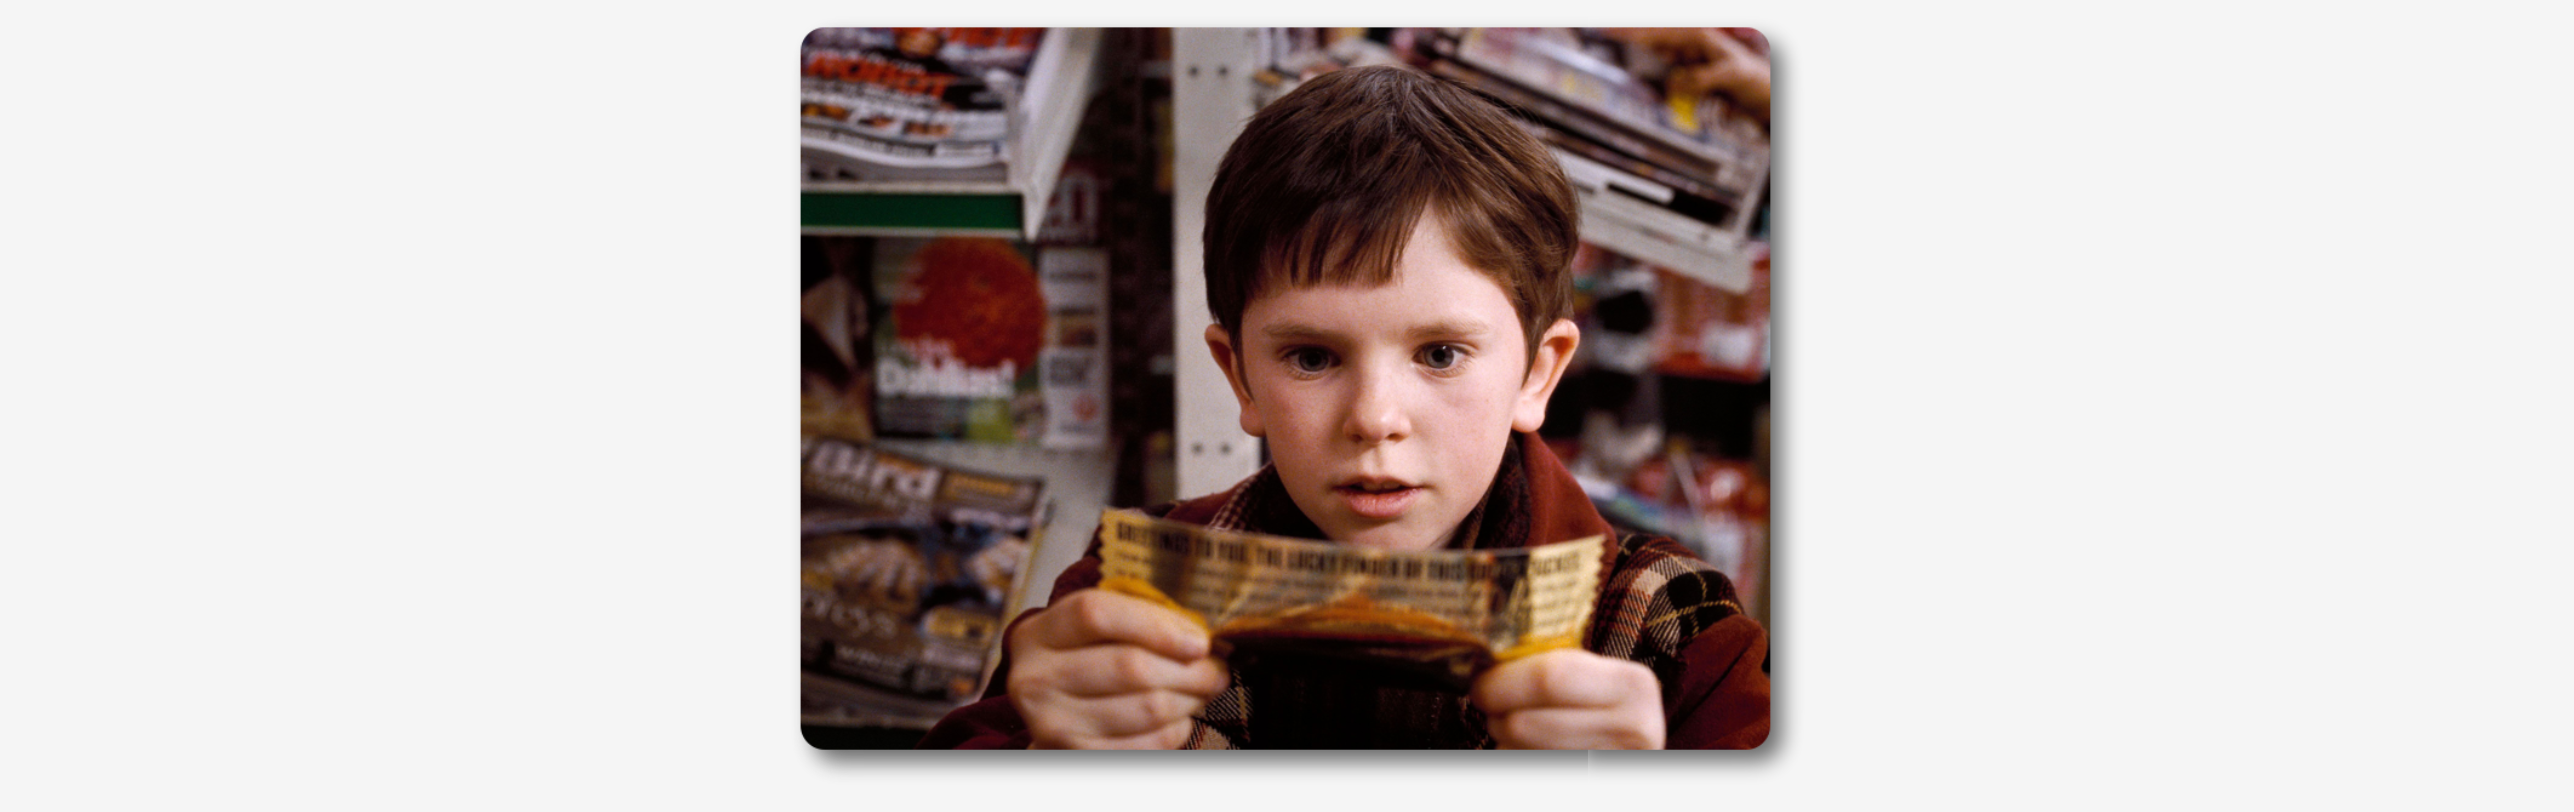

 [<div align="center">Источник:<span style="color:green">Charlie and the Chocolate Factory</span></div>](https://www.imdb.com/title/tt0367594/ "Charlie and the Chocolate Factory")

# Первичный отсмотр данных

In [482]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [191]:
display(stud.head(10))
stud.info()

school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
0     GP   F   18       U     NaN       A   4.0   4.0   at_home  teacher   
1     GP   F   17       U     GT3     NaN   1.0   1.0   at_home    other   
2     GP   F   15       U     LE3       T   1.0   1.0   at_home    other   
3     GP   F   15       U     GT3       T   4.0   2.0    health      NaN   
4     GP   F   16       U     GT3       T   3.0   3.0     other    other   
5     GP   M   16       U     LE3       T   4.0   3.0  services    other   
6     GP   M   16     NaN     LE3       T   2.0   2.0     other    other   
7     GP   F   17       U     GT3       A   4.0   4.0     other  teacher   
8     GP   M   15       U     LE3       A   3.0   2.0  services    other   
9     GP   M   15       U     NaN     NaN   3.0   4.0     other    other   

       reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0      course   mother         2.0        2.0       0.0       yes     no   no   
1      course   father         1.0        2.0       0.0        no    yes   no   
2       other   mother         1.0        2.0       3.0       yes     no  NaN   
3        home   mother         1.0        3.0       0.0        no    yes  yes   
4        home   father         1.0        2.0       0.0        no    yes  yes   
5  reputation   mother         1.0        2.0       0.0        no    yes  yes   
6        home   mother         1.0        2.0       0.0        no     no   no   
7        home   mother         2.0        2.0       0.0       yes    yes   no   
8        home   mother         1.0        2.0       0.0        no    yes  yes   
9        home   mother         1.0        2.0       0.0        no    yes  yes   

  activities nursery  studytime, granular higher internet romantic  famrel  \
0         no     yes                 -6.0    yes      NaN       no     4.0   
1         no      no                 -6.0    yes      yes       no     5.0   
2         no     yes                 -6.0    yes      yes      NaN     4.0   
3        yes     yes                 -9.0    yes      yes      yes     3.0   
4         no     yes                 -6.0    yes       no       no     4.0   
5        yes     yes                 -6.0    yes      yes       no     5.0   
6         no     yes                 -6.0    yes      yes       no     4.0   
7         no     yes                 -6.0    yes       no       no     4.0   
8         no     yes                 -6.0    yes      yes       no     NaN   
9        yes     yes                 -6.0    yes      yes       no     5.0   

   freetime  goout  health  absences  score  
0       3.0    4.0     3.0       6.0   30.0  
1       3.0    3.0     3.0       4.0   30.0  
2       3.0    2.0     3.0      10.0   50.0  
3       2.0    2.0     5.0       2.0   75.0  
4       3.0    2.0     5.0       4.0   50.0  
5       4.0    2.0     5.0      10.0   75.0  
6       4.0    4.0     3.0       0.0   55.0  
7       1.0    4.0     1.0       6.0   30.0  
8       2.0    2.0     1.0       0.0   95.0  
9       5.0    1.0     5.0       0.0   75.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Дата сет содержит 13 цисловых и 17 строковых столбцов. А так же 395 строк.

In [363]:
print('Количество пустых значений для каждого столбца')
stud.isnull().sum()

Количество пустых значений для каждого столбца


school                  0
sex                     0
age                     0
address                 0
famsize                 0
Pstatus                 0
Medu                    3
Fedu                   24
Mjob                    0
Fjob                    0
reason                  0
guardian                0
traveltime             28
studytime               7
failures               22
schoolsup               0
famsup                  0
paid                    0
activities              0
nursery                 0
studytime, granular     7
higher                  0
internet                0
romantic                0
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [364]:
print('Список названий столбцов')
stud.columns

Список названий столбцов


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Данные для номинотивных столбцов. Произведена замена отсутствующих значений строкой "None". На графиках предоставленны данные о количестве уникальных значений


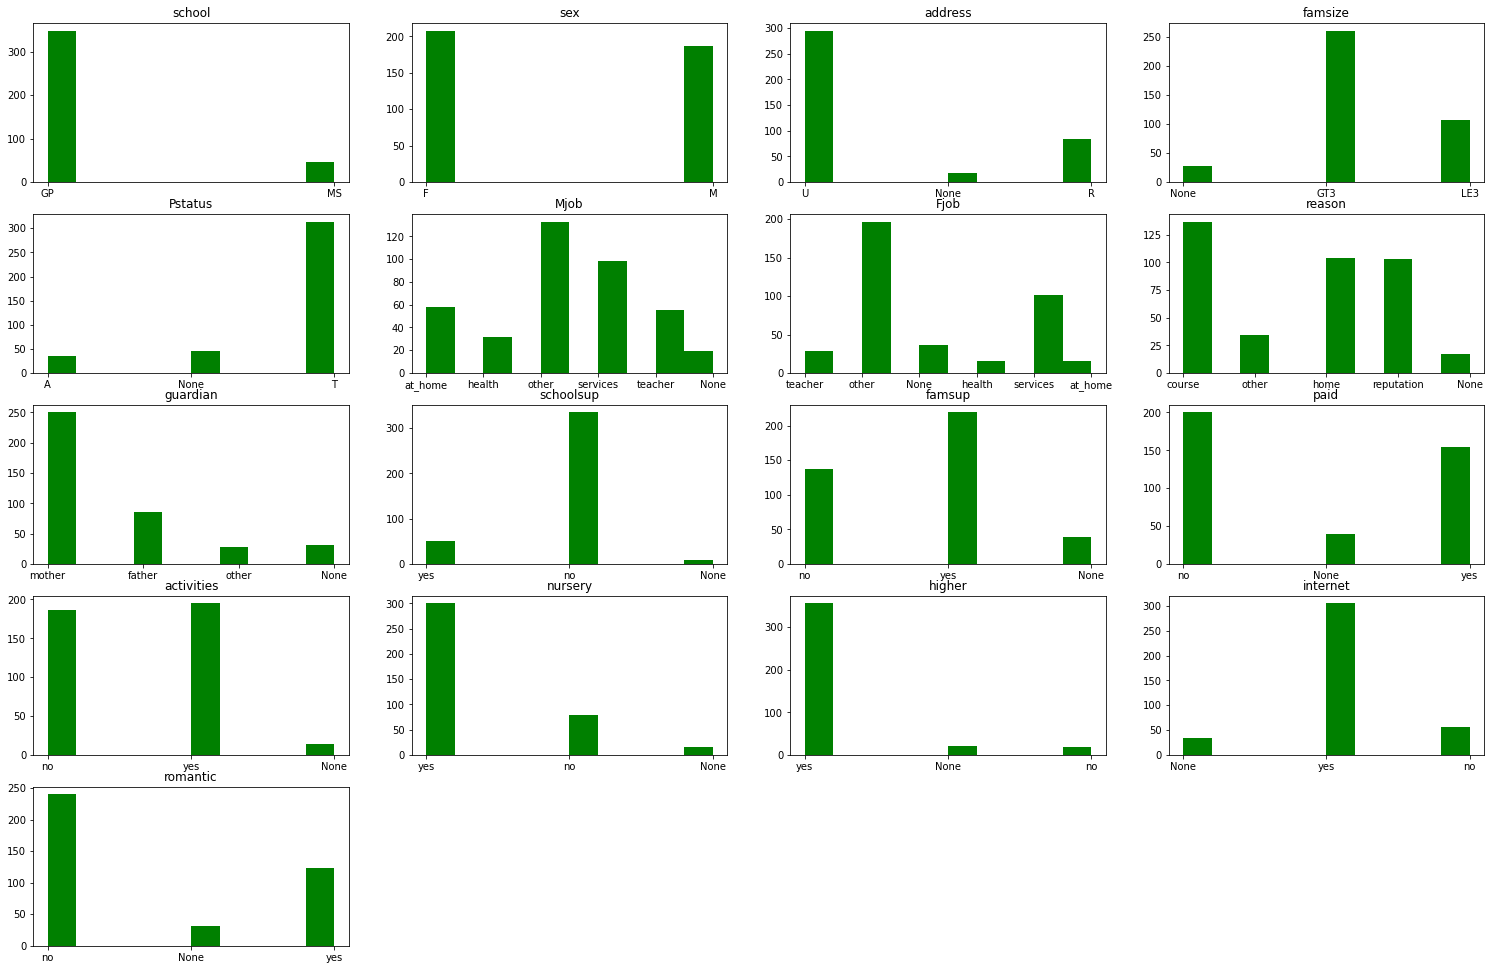

In [366]:
print(
    'Данные для номинотивных столбцов. Произведена замена отсутствующих значений строкой "None". На графиках предоставлены данные о количестве уникальных значений.'
)
objects = stud.select_dtypes(include=[object])
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(objects)[:]):
    stud[col].fillna(value='None', inplace=True)
    plt.subplot(7, 4, i + 1)
    plt.hist(stud[col], color='green')
    plt.title(col)

Быстрый просмотр числовых переменных.


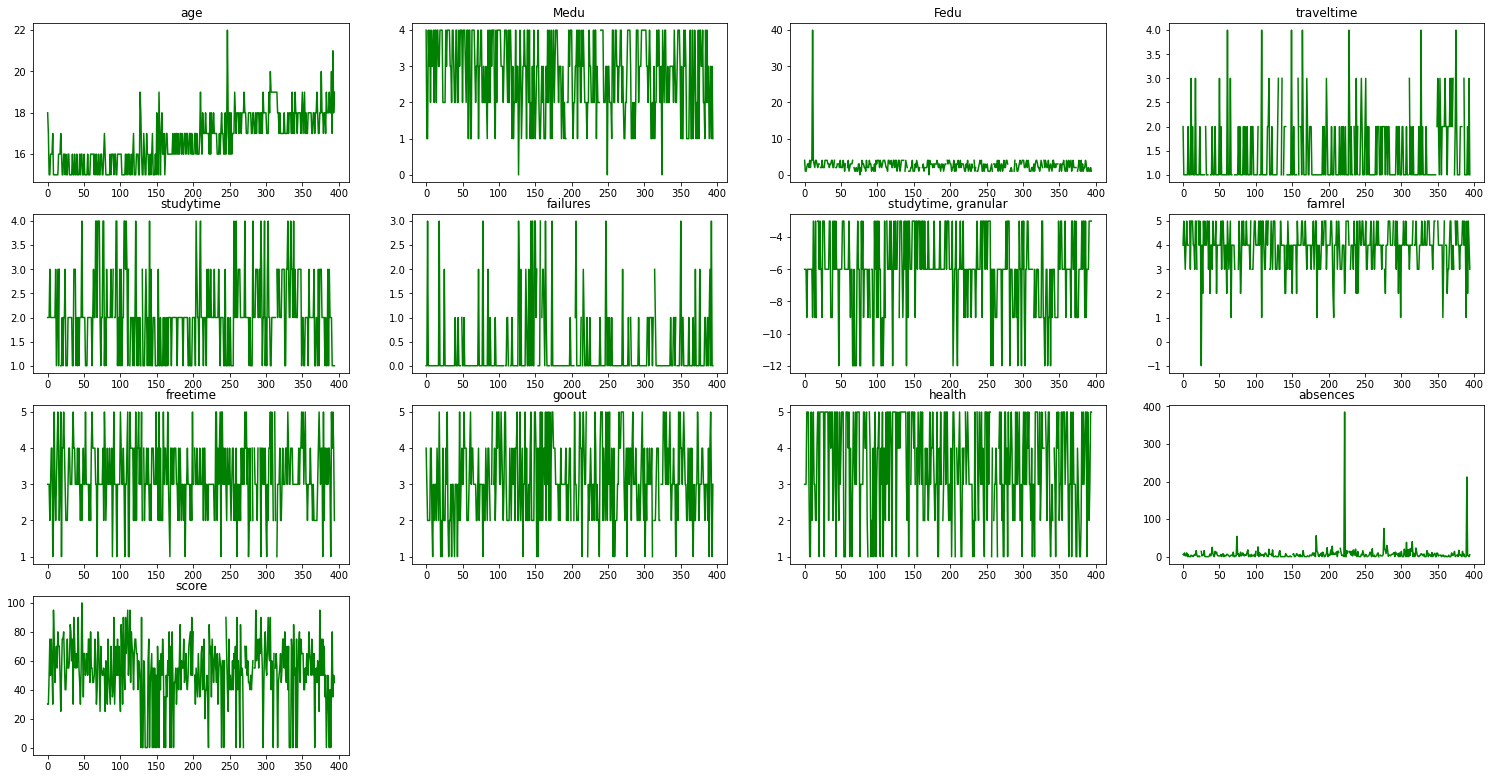

In [369]:
numbers = stud.select_dtypes(include=[float, int])
print('Быстрый просмотр числовых переменных.')
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(numbers)[:]):
    plt.subplot(7, 4, i + 1)
    plt.plot(stud[col], color='green')
    plt.title(col)

Сразу становятся заметными выбросы в столбцах fedu, famrel, absences. Устраним их

### Рассмотрим столбцы по отдельности

<span style="background-color:green; color:white; font-family: 'Bebas Neue'; font-size: 3em">Fedu</span>

Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Колличество пропущенных значений в стрлбце Fedu = 24


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

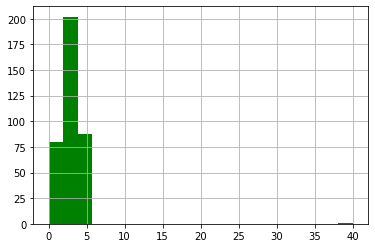

In [483]:
print(
    f'Колличество пропущенных значений в стрлбце Fedu = {stud.Fedu.isnull().sum()}'
)
stud.Fedu.hist(color='green', bins=21)
stud.Fedu.describe()

Обнаружено 24 отсутствующих значений, которые поменяем на значение верхнего соседа. К тому же есть выброс - одно значение равное 40. Тут скорее всего произошла ошибка, и 40 = 4. Сделаем преобразования:

Колличество пропущенных значений в стрлбце Fedu = 0


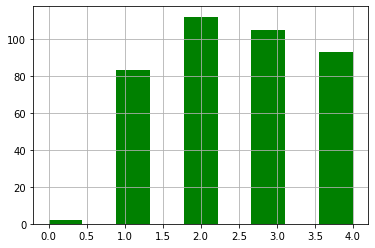

In [484]:
stud.Fedu.fillna(method='ffill', inplace=True)
stud.loc[(stud['Fedu'] == 40 )] = 4
stud.Fedu.hist(color='green', bins = 9)
print(
    f'Колличество пропущенных значений в стрлбце Fedu = {stud.Fedu.isnull().sum()}'
)

<span style="background-color:green; color:white; font-family: 'Bebas Neue'; font-size: 3em">famrel</span>

famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

Колличество пропущенных значений в стрлбце famrel = 27


count    368.000000
mean       3.934783
std        0.925619
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

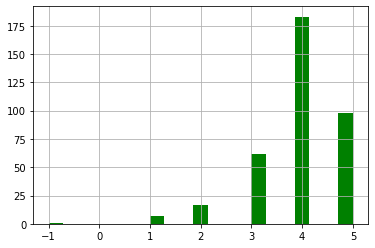

In [485]:
print(
    f'Колличество пропущенных значений в стрлбце famrel = {stud.famrel.isnull().sum()}'
)
stud.famrel.hist(color='green', bins=21)
stud.famrel.describe()

Выброс - значение -1. Скорее всего оно равно 1 (или у кого-то хорошее чувство юмора, или случайно попал знак минус). Заменим его. В том числе и отсутсвтующие значения модой, так как отношения у подовляющего большинстава на четверку.

Колличество пропущенных значений в стрлбце famrel = 0


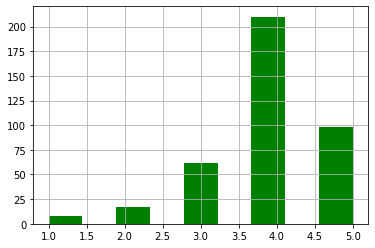

In [487]:
stud.famrel.fillna(stud.famrel.mode()[0], inplace=True)
stud.loc[(stud['famrel'] == -1 )] = 1
stud.famrel.hist(color='green', bins = 9)
print(
    f'Колличество пропущенных значений в стрлбце famrel = {stud.famrel.isnull().sum()}'
)

<span style="background-color:green; color:white; font-family: 'Bebas Neue'; font-size: 3em">absences</span>

absences — количество пропущенных занятий

Колличество пропущенных значений в стрлбце famrel = 12


school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
222     GP   F   16       U     GT3       T   2.0   3.0  services   teacher   
390     MS   M   20       U     LE3       A   2.0   2.0  services  services   

     reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
222   other   mother         1.0        2.0       0.0       yes    NaN   no   
390  course      NaN         1.0        2.0       2.0        no    yes  yes   

    activities nursery  studytime, granular higher internet romantic  famrel  \
222         no     yes                 -6.0    yes      yes       no     2.0   
390         no     yes                 -6.0    yes       no       no     5.0   

     freetime  goout  health  absences  score  
222       3.0    1.0     3.0     385.0   85.0  
390       5.0    4.0     4.0     212.0   45.0

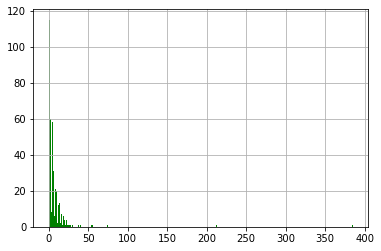

In [491]:
print(
    f'Колличество пропущенных значений в стрлбце absences = {stud.absences.isnull().sum()}'
)
stud.absences.hist(color='green', bins=300)
stud.absences.describe()
stud[stud.absences > 100]

Есть несколько выбросов. Самое большое у ученика с высоким баллы по госэкзамену по математике. Возможно домашнее обучение оказалось более эффективным, но для таких выводов у нас не достаточно данных. Второй вариант - довольно низкий балл. Думаю, что эти два случая можно поменять на среднее колличество пропусов, так же как и отсутствующие значения.

In [492]:
stud.absences.fillna(stud.absences.mean()[0], inplace=True)
stud[stud.absences > 100].fillna((stud.absences.mean()[0], inplace=True))
stud.loc[(stud['absences'] == -1 )] = 1
stud.absences.hist(color='green', bins = 9)
print(
    f'Колличество пропущенных значений в стрлбце absences = {stud.absences.isnull().sum()}'
)

SyntaxError: invalid syntax (<ipython-input-492-d69c8bd64a0b>, line 2)

<span style="background-color:green; color:white; font-family: 'Bebas Neue'; font-size: 3em">age</span>

Уникальные значения: 8


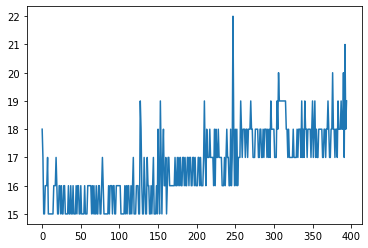

In [152]:
print(f'Уникальные значения: {stud.age.nunique()}')
plt.plot(stud.age)

Возраст студентов распределен по 8 группам от 15 до 22 лет. Нет пропущенных значений.

<span style="background-color:green; color:white; font-family: 'Bebas Neue'; font-size: 3em">address</span>

Проверяем, есть ли пропущенные значения.

In [153]:
pd.DataFrame(stud.address.value_counts())

address
U         295
R          83
None       17

Большинство детей живет в черте города.
Заменим ячейки со значением nan на None для удобства.

<span style="background-color:green; color:white; font-family: 'Bebas Neue'; font-size: 3em">famsize</span>

In [154]:
pd.DataFrame(stud.famsize.value_counts())

famsize
GT3       261
LE3       107
None       27

<span style="background-color:green; color:white; font-family: 'Bebas Neue'; font-size: 3em">Pstatus</span>

In [155]:
pd.DataFrame(stud.Pstatus.value_counts())

Pstatus
T         314
None       45
A          36

У каждого десятого ребенка родители живут отдельно. Заменим ячейки со значением nan на None для удобства.

<span style="background-color:green; color:white; font-family: 'Bebas Neue'; font-size: 3em">Medu</span>

Medu
4.0   131
2.0   102
3.0    97
1.0    59
0.0     3

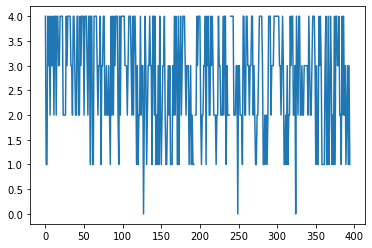

In [234]:
plt.plot(stud.Medu)
pd.DataFrame(stud.Medu.value_counts())

<span style="background-color:green; color:white; font-family: 'Bebas Neue'; font-size: 3em">Fedu</span>

Проверяем, есть ли пропущенные значения.

Missing values: 24


Fedu
2.0    106
3.0     96
4.0     88
1.0     78
0.0      2
40.0     1

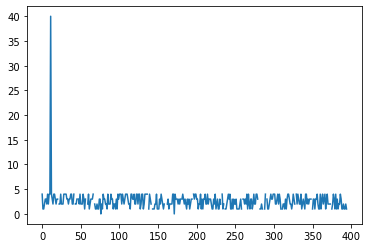

In [112]:
print(f'Missing values: {stud.Fedu.isnull().sum()}')
plt.plot(stud.Fedu)
pd.DataFrame(stud.Fedu.value_counts())

In [66]:
#sorted(pd.unique(cacao['specific_origin']).tolist())